In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = './iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x_prime = data[list(range(4))]
#将第4列同类型标为0 1 2
y=pd.Categorical(data[4]).codes


In [7]:
#进行特征比较
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(9, 6), facecolor='w')
for i, pair in enumerate(feature_pairs):
#获取数据
    x = x_prime[pair]
#     print(x)
#决策树学习
#使用了gini就是使用了CART算法
    clf=DecisionTreeClassifier(criterion='gini',max_depth=5)
    clf.fit(x,y)
    y_hat=clf.predict(x)
    score=clf.score(x,y)
    
    

<Figure size 648x432 with 0 Axes>

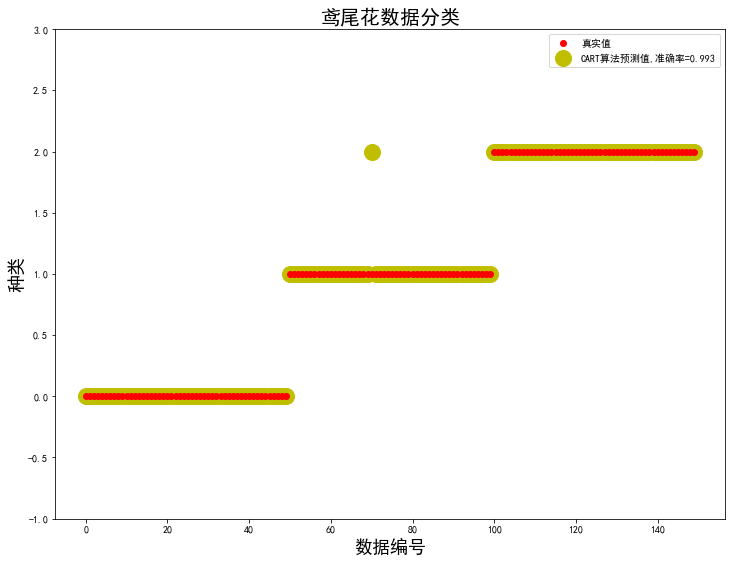

In [9]:
#预测结果画图
x_test_len=np.arange(len(x))
plt.figure(figsize=(12,9),facecolor='w')
plt.ylim(-1,3)
plt.plot(x_test_len,y,'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_test_len, y_hat, 'yo', markersize = 16, zorder=1, label=u'CART算法预测值,准确率=%.3f' % score)
plt.legend(loc = 'upper right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()